In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib
import math
import warnings

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("winequality-red.csv")
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

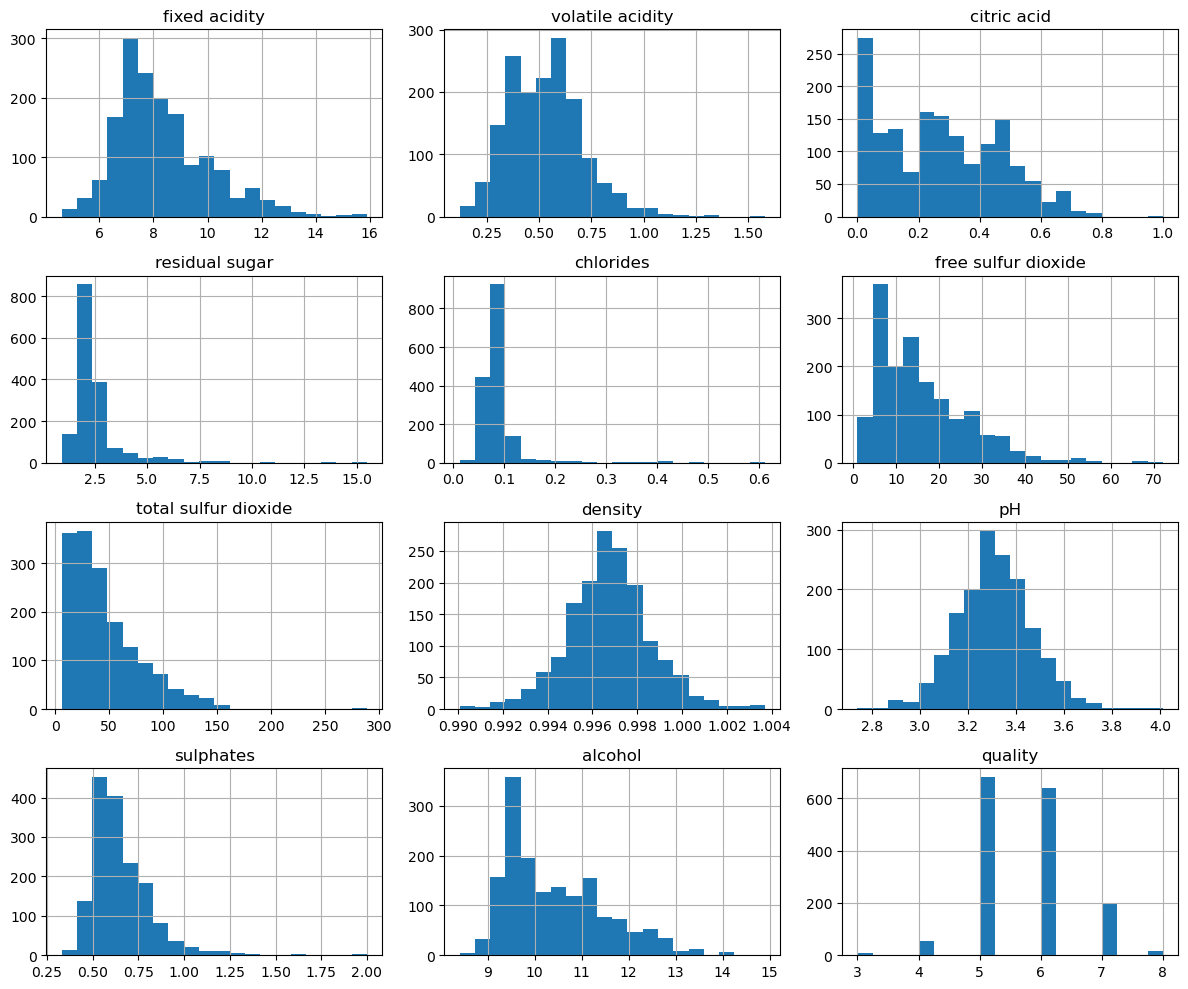

In [8]:
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

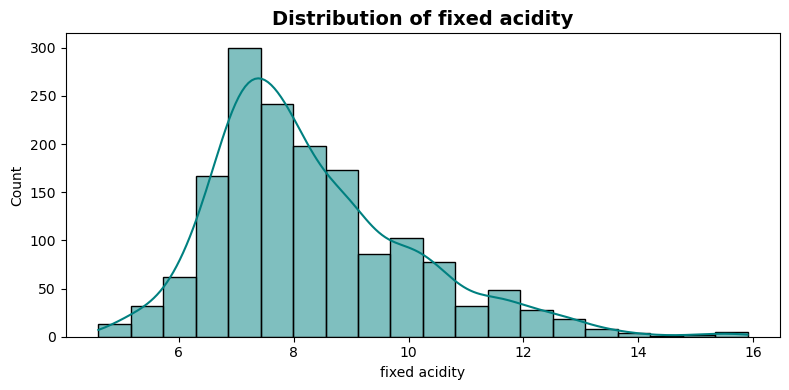

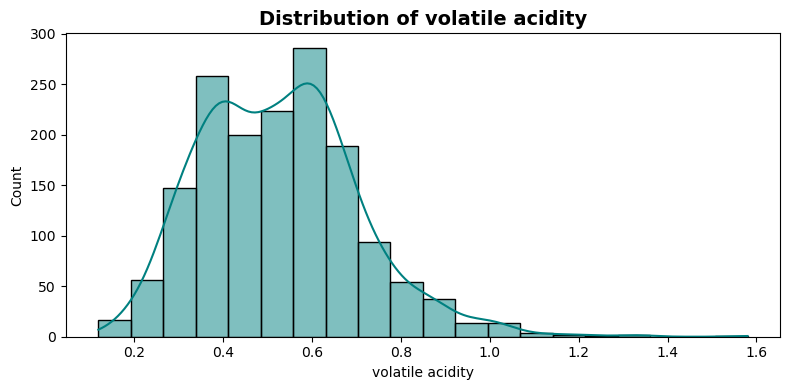

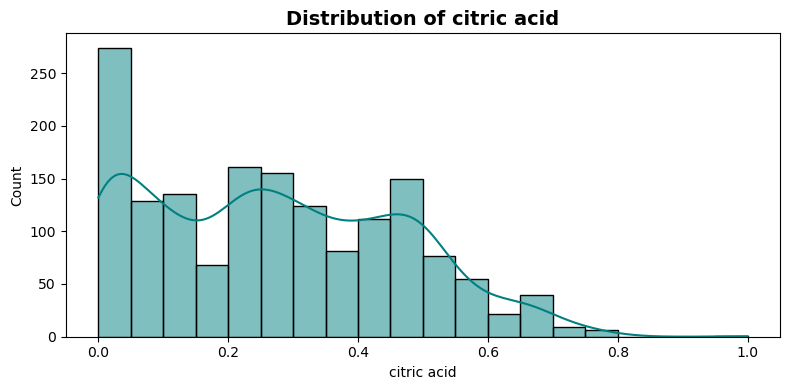

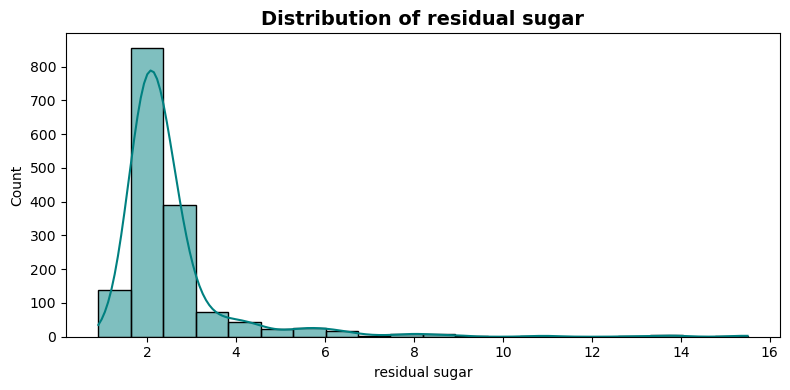

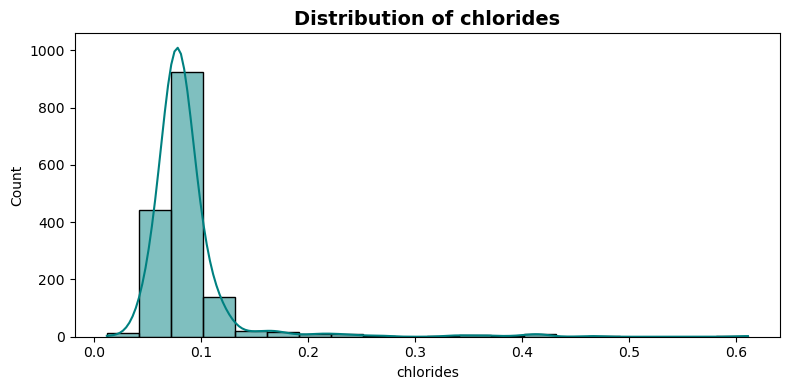

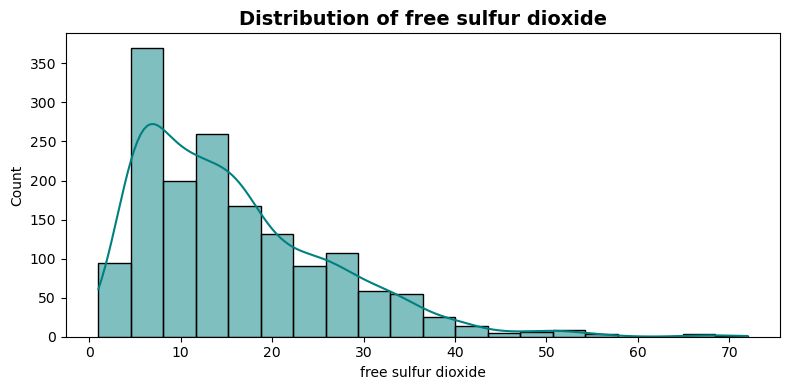

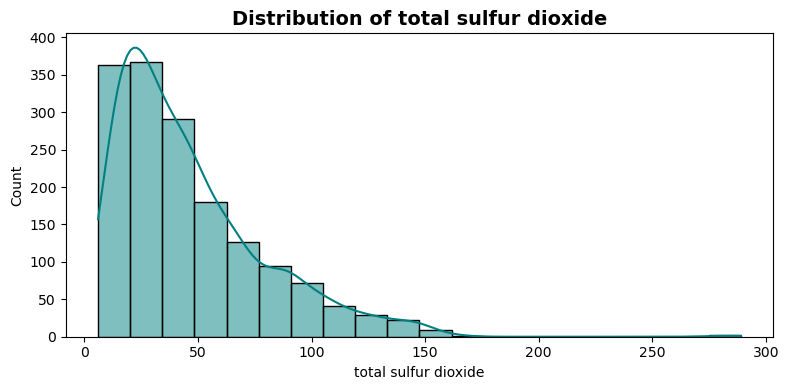

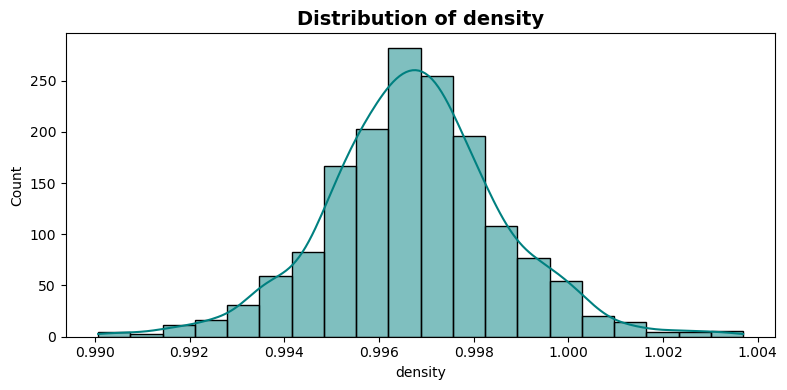

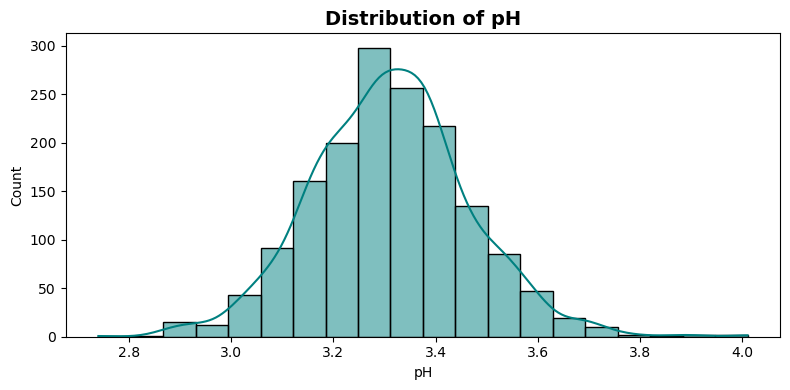

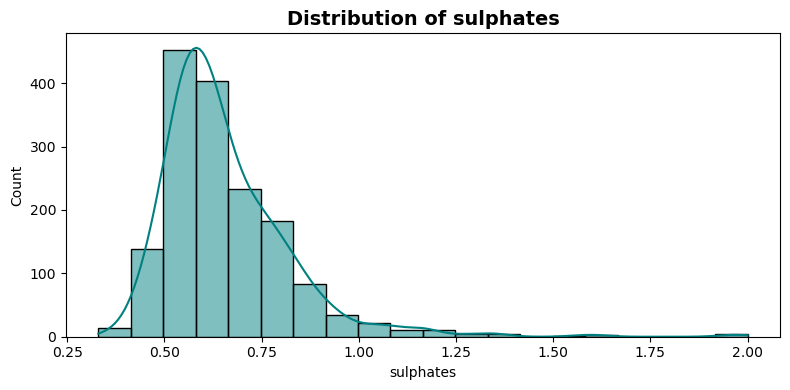

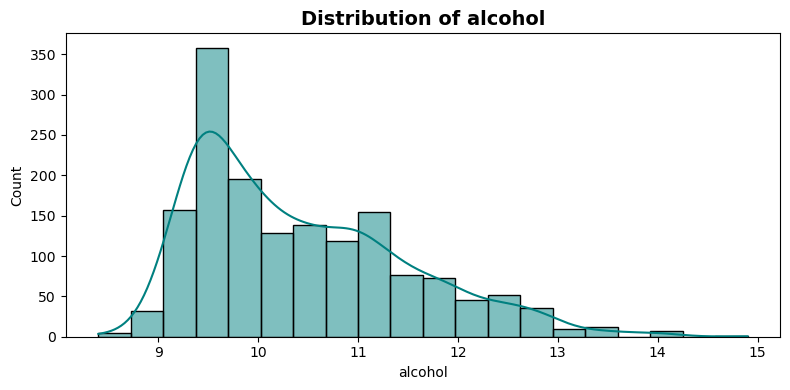

In [9]:
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(data=df, x=col, kde=True, bins=20, color='teal')
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=None)
    plt.tight_layout()
    plt.show()

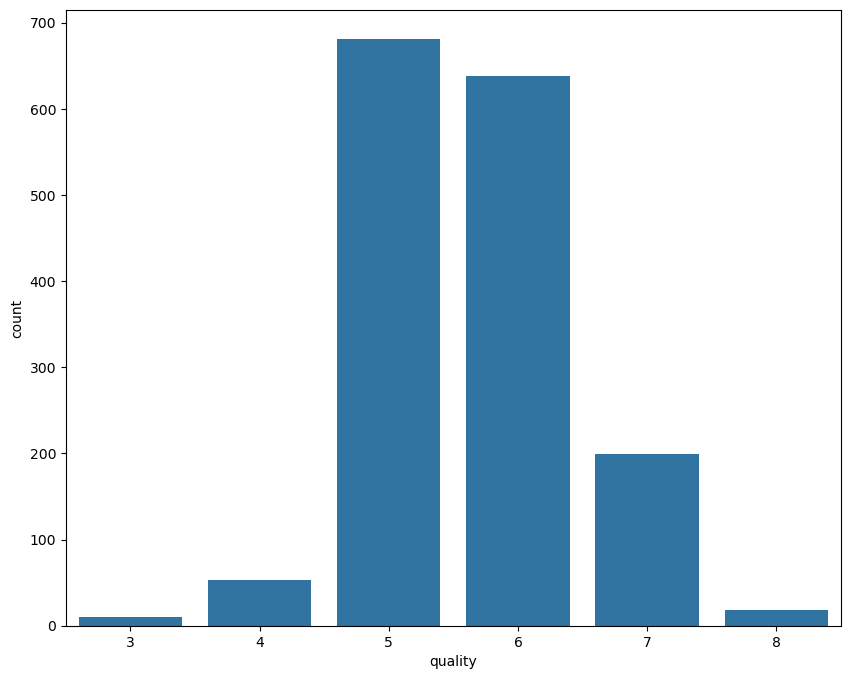

In [10]:
plt.figure(figsize = (10, 8))
sns.countplot(x = "quality", data = df)
plt.show()

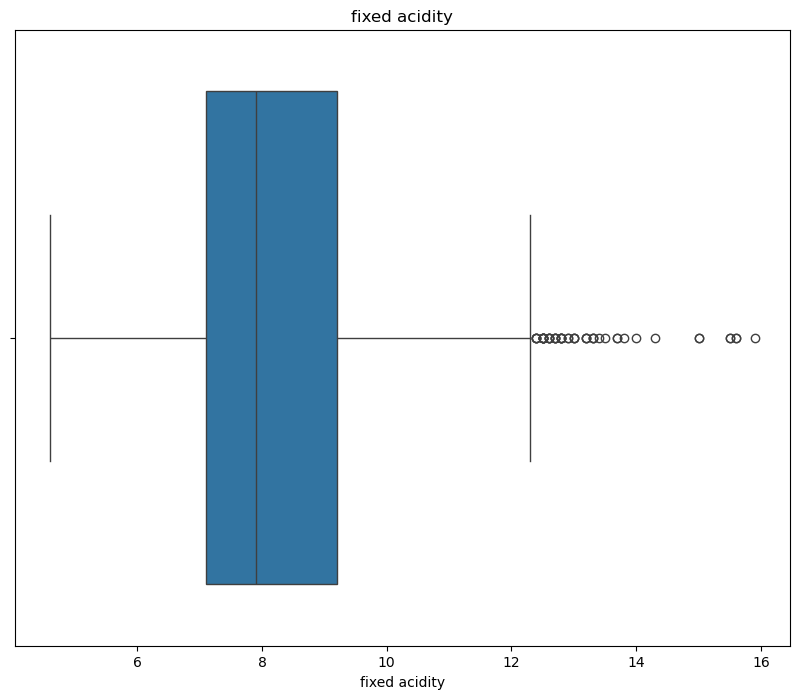

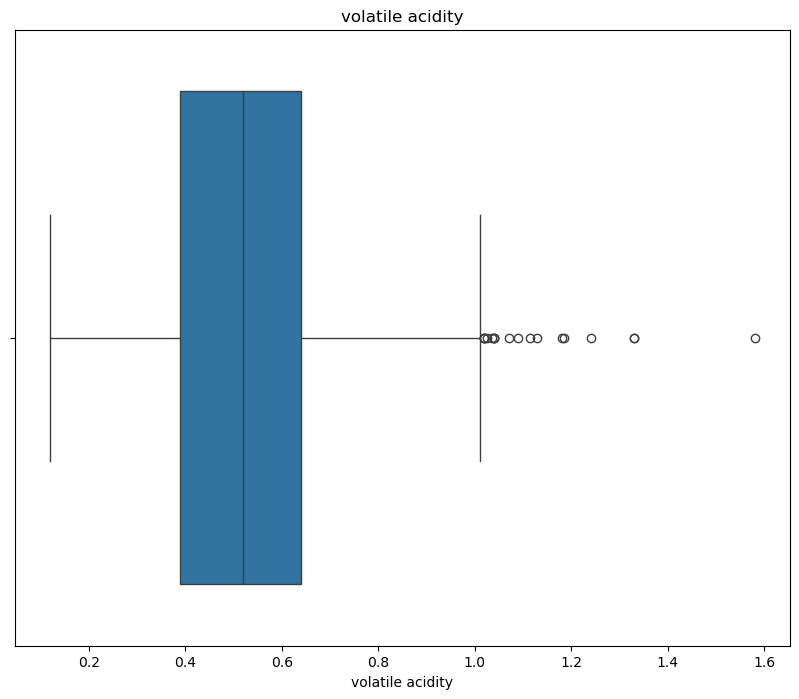

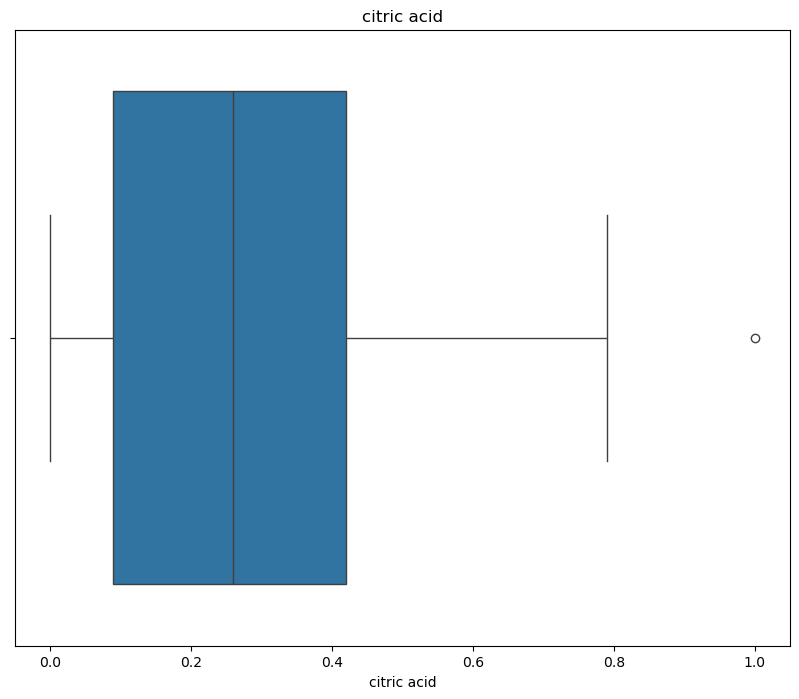

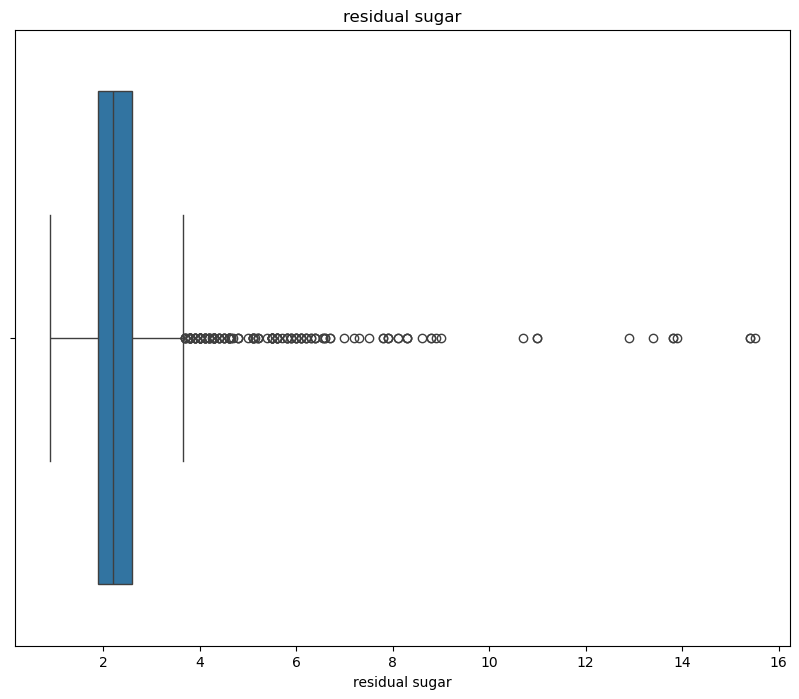

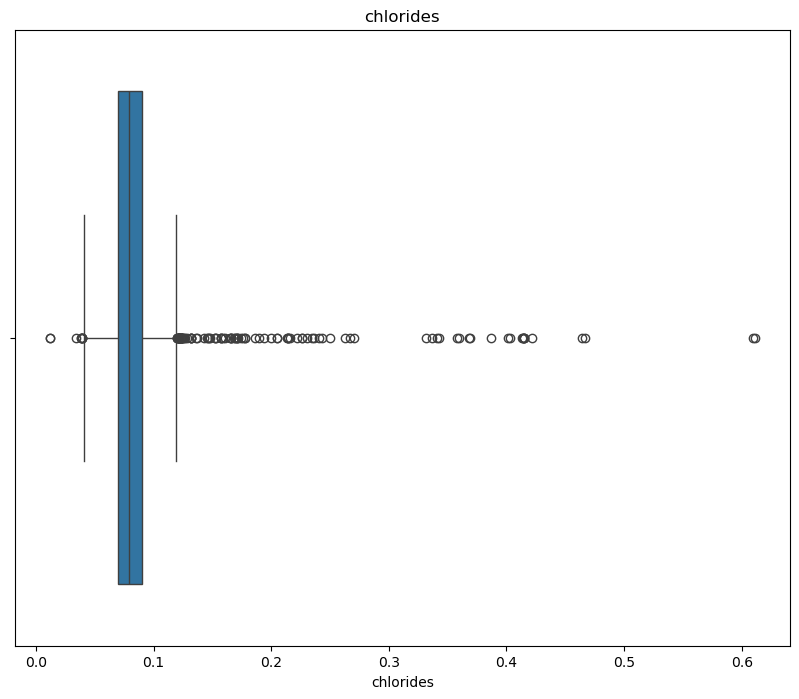

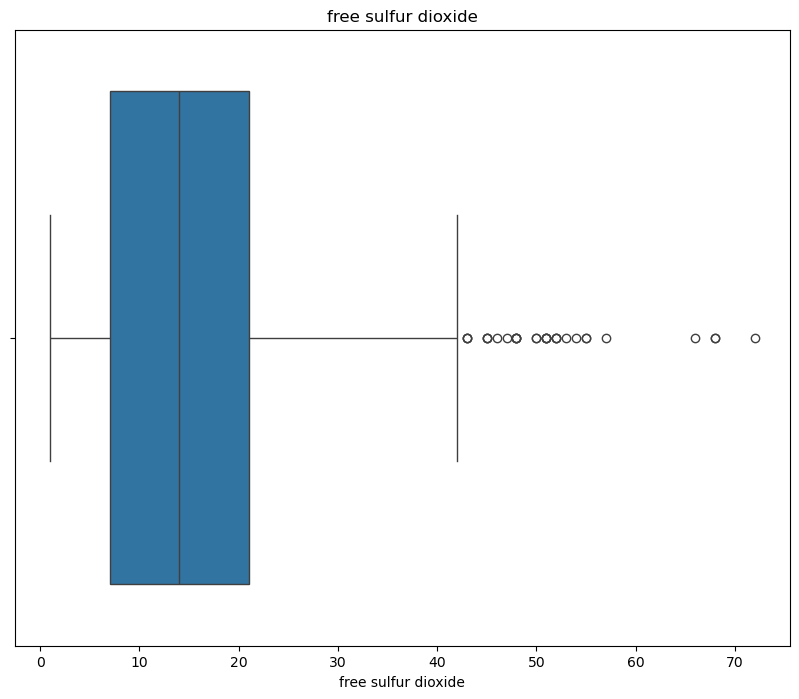

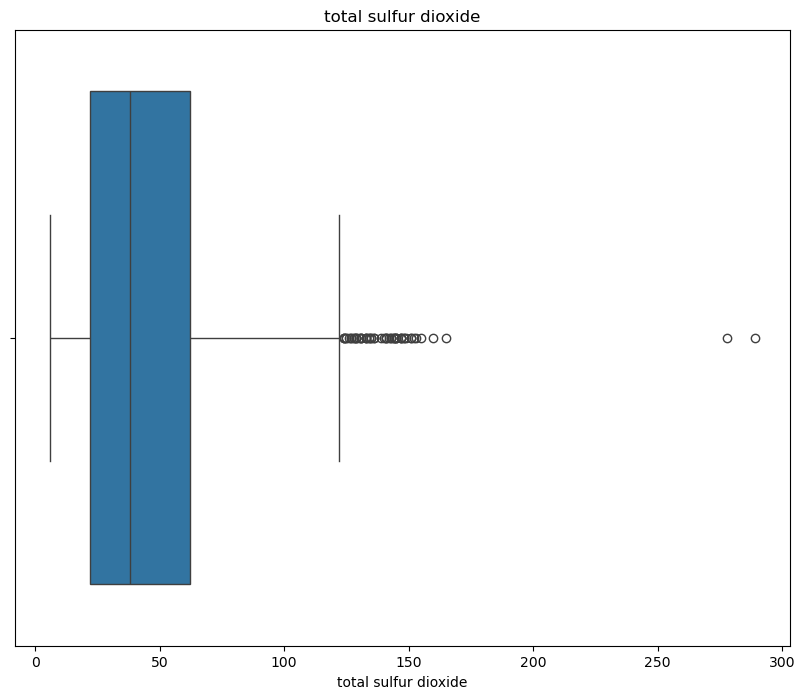

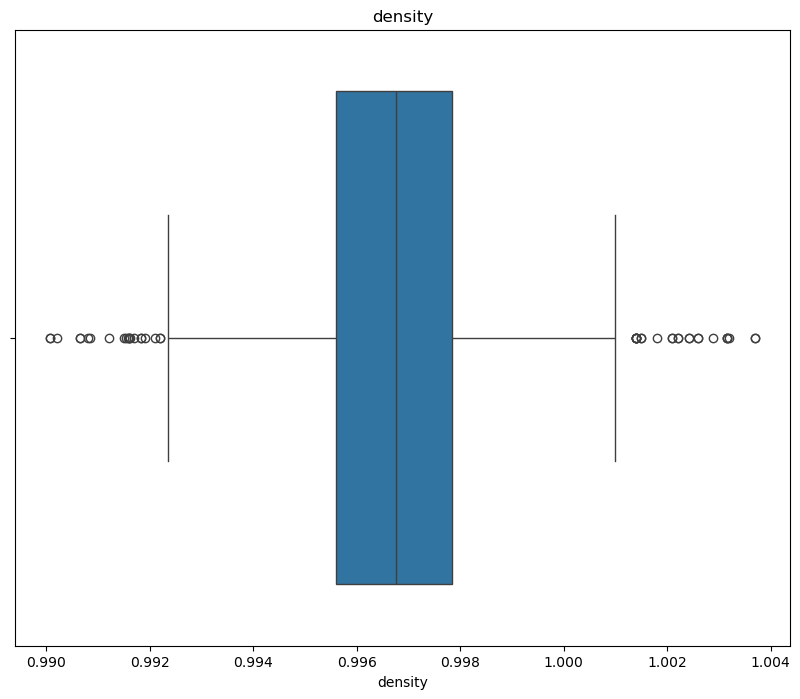

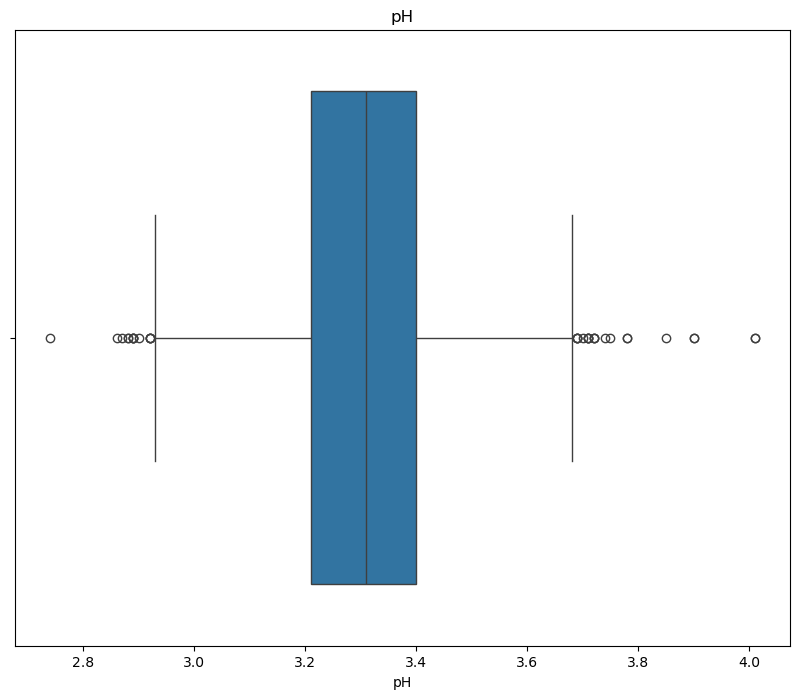

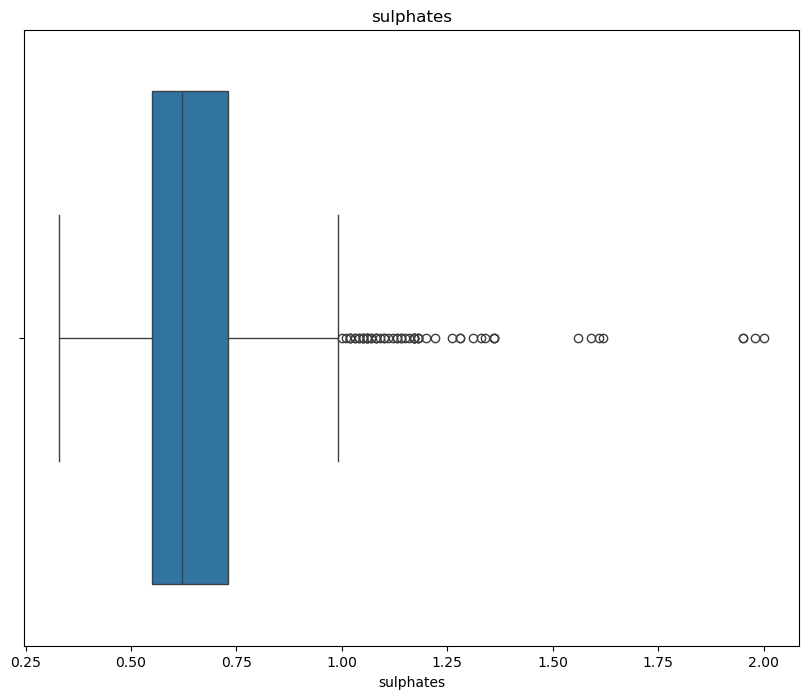

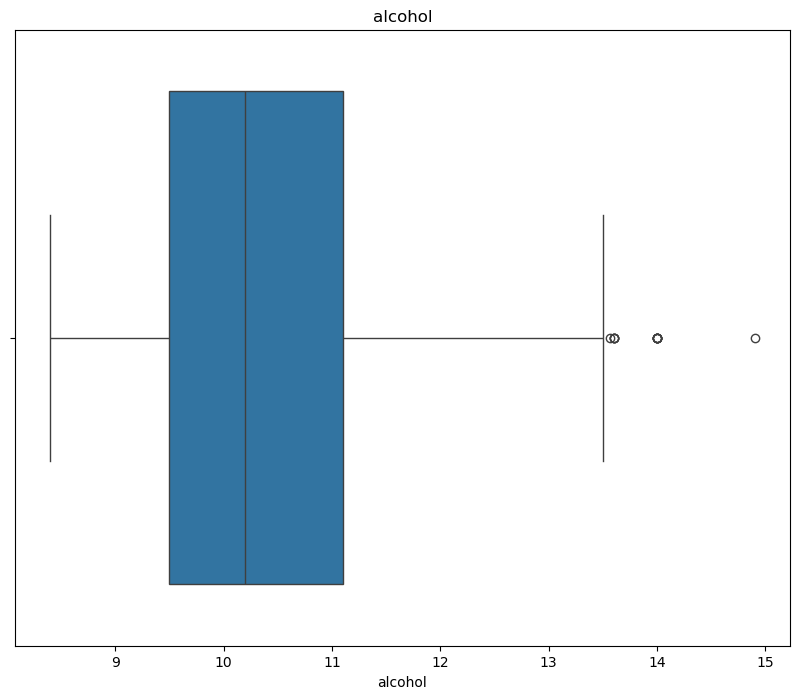

In [11]:
for col in df.columns[:-1]:  # skip 'quality'
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

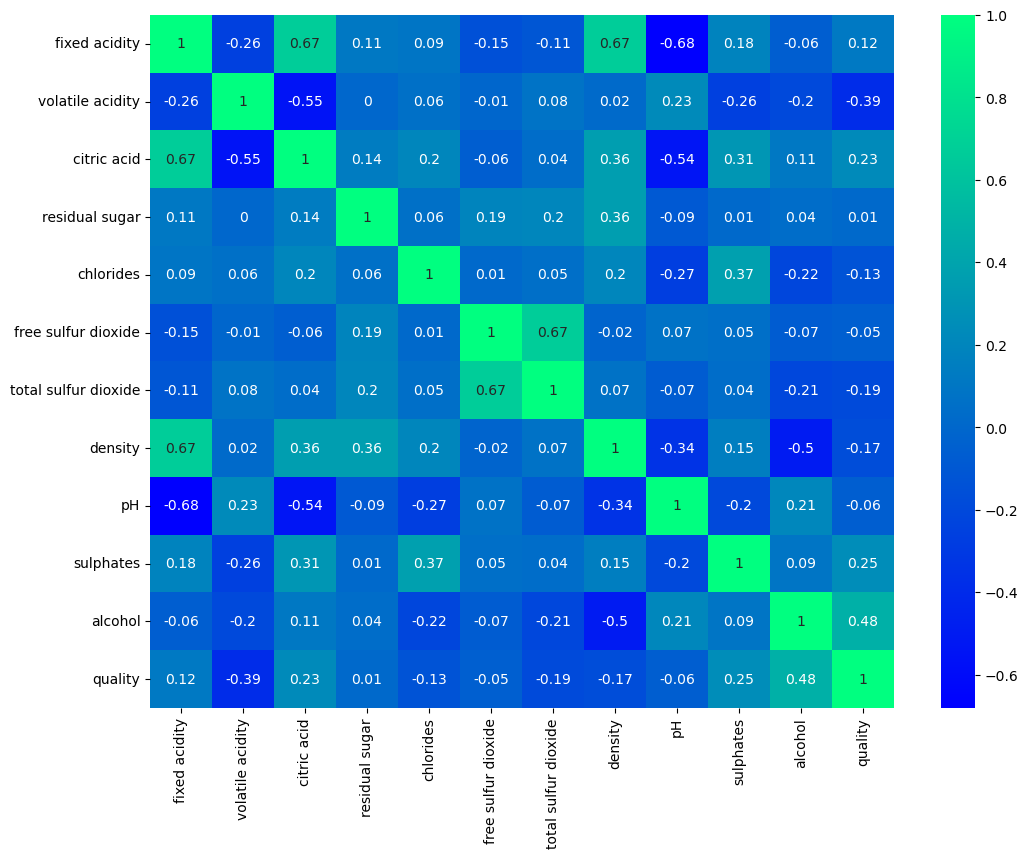

In [12]:
plt.figure(figsize = (12, 9))
corr = round(df.corr(numeric_only=True), 2)
sns.heatmap(corr, annot=True, cmap='winter')
plt.show()

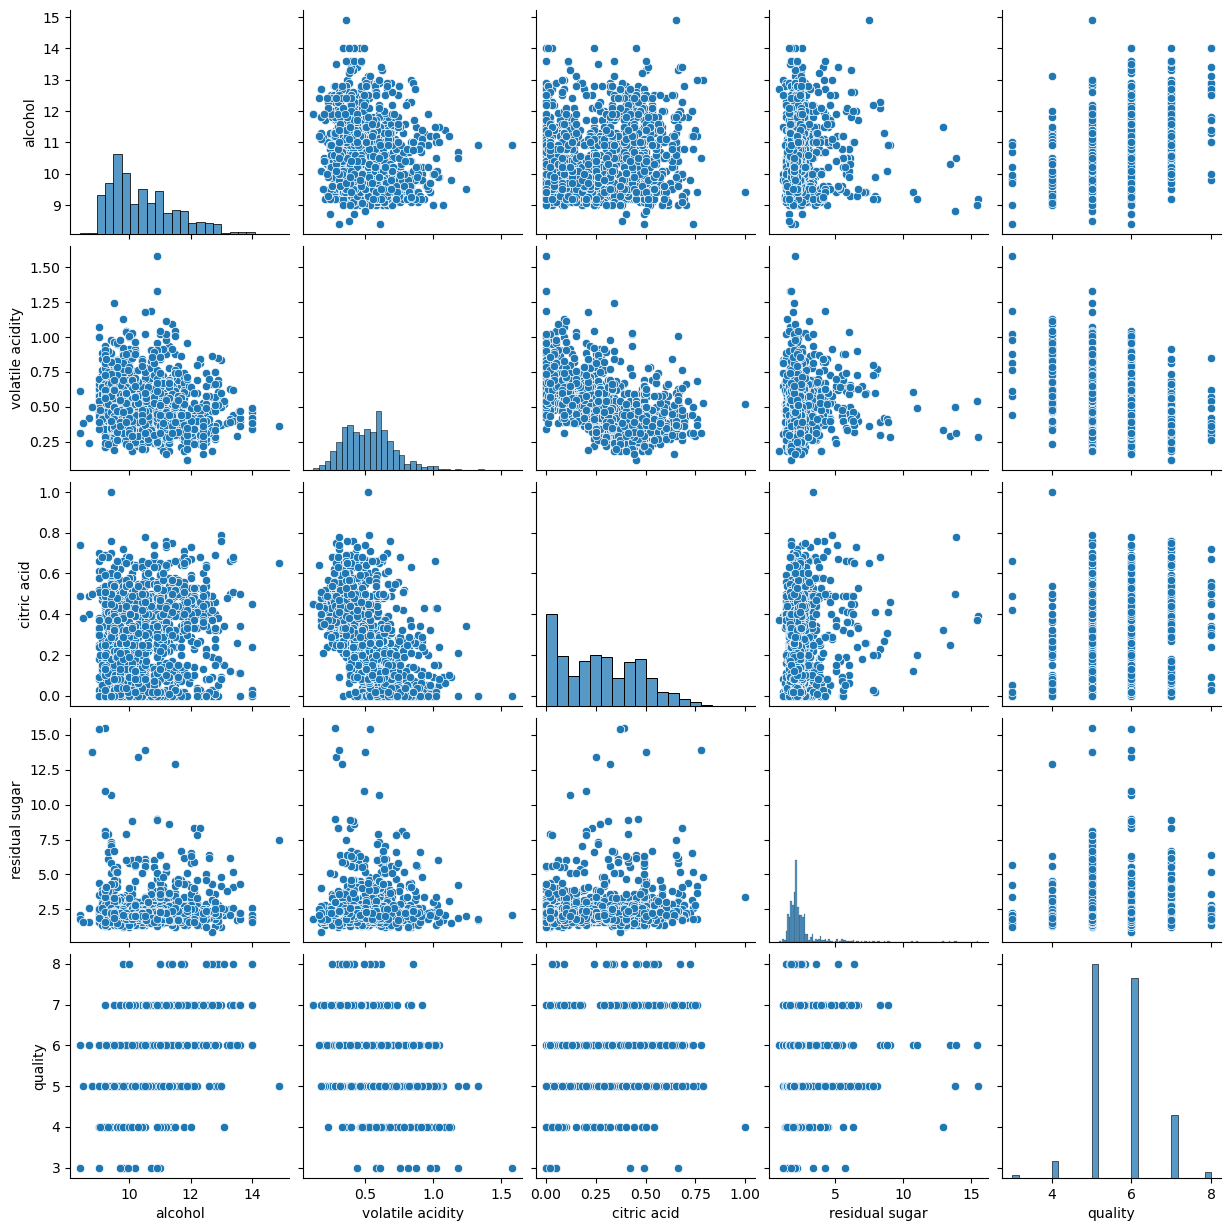

In [13]:
sns.pairplot(df, vars=['alcohol', 'volatile acidity', 'citric acid', 'residual sugar', 'quality'])
plt.show()

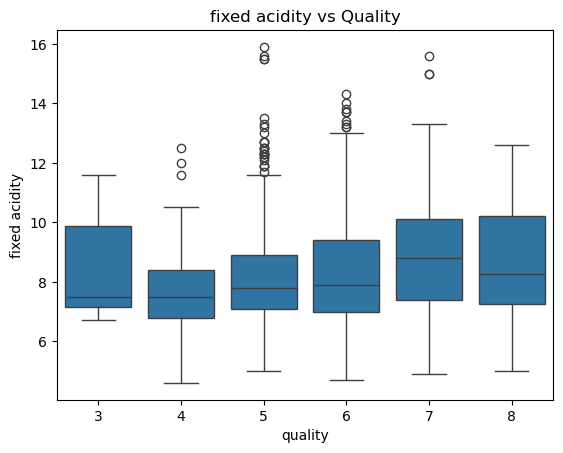

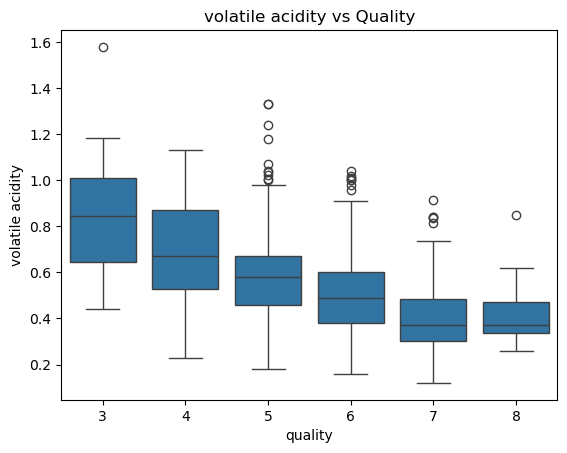

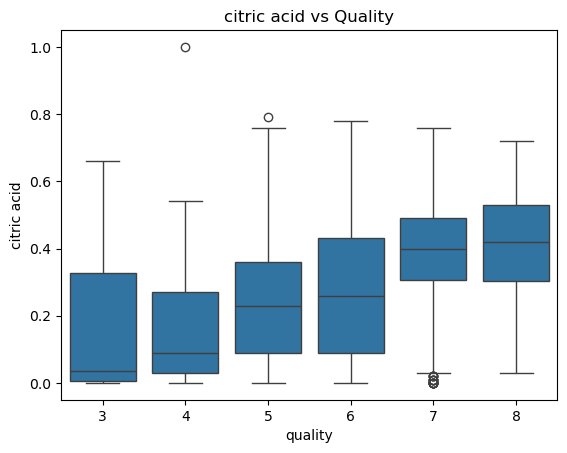

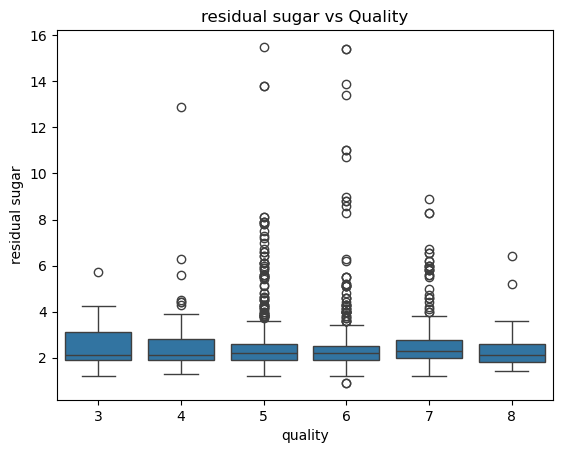

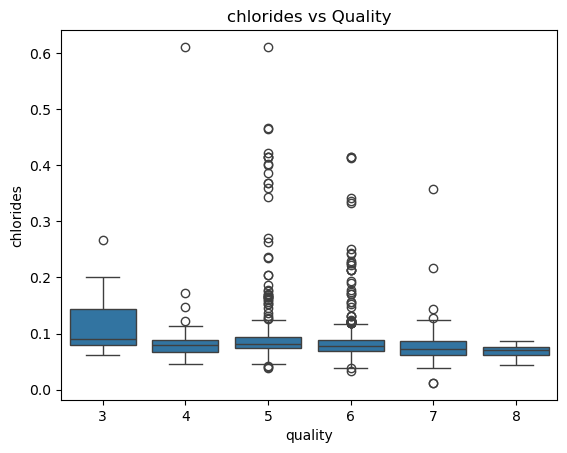

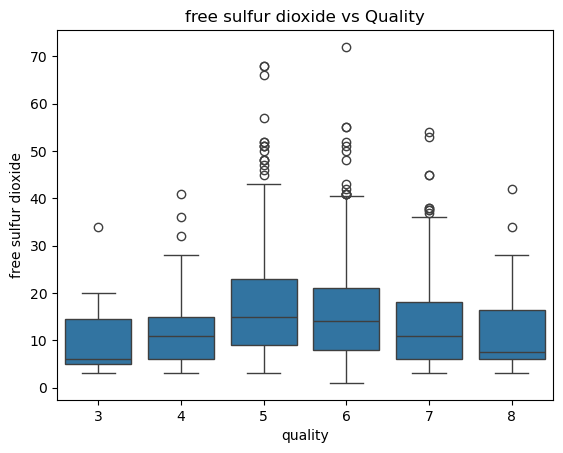

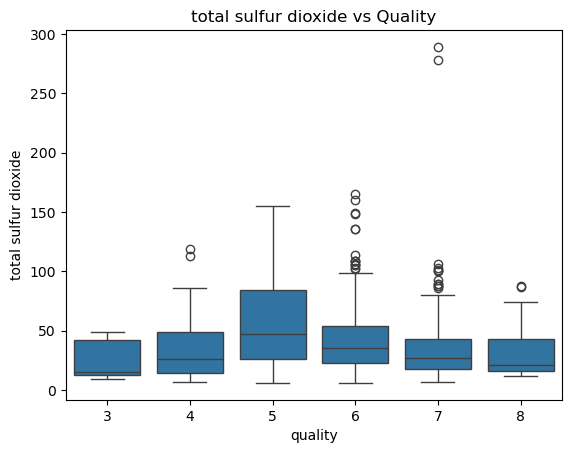

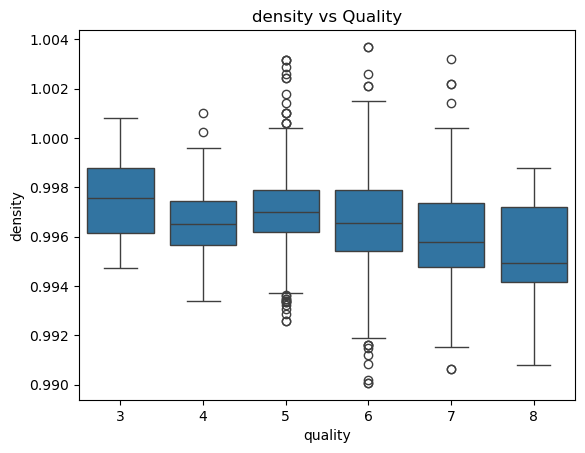

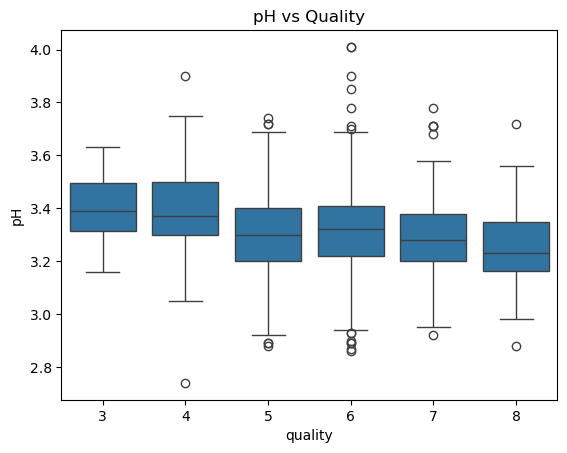

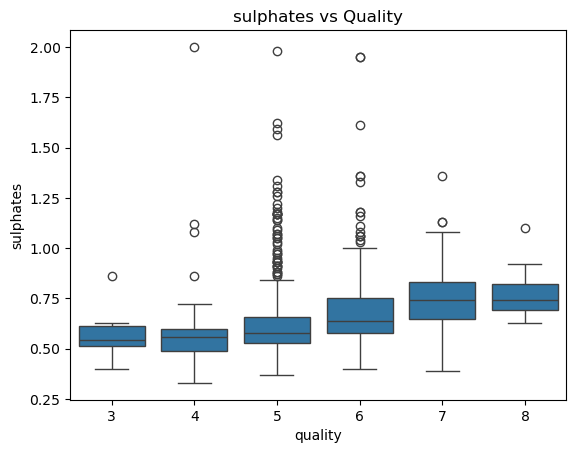

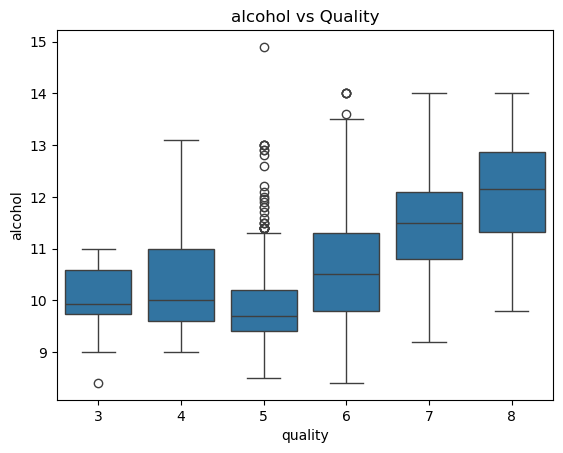

In [14]:
for col in df.columns[:-1]:
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(f'{col} vs Quality')
    plt.show()

In [15]:
# for col in df.columns[:-1]:
#     sns.barplot(x='quality', y=col, data=df)
#     plt.title(f'{col} vs Quality')
#     plt.show()

In [16]:
correlation = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)
correlation

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

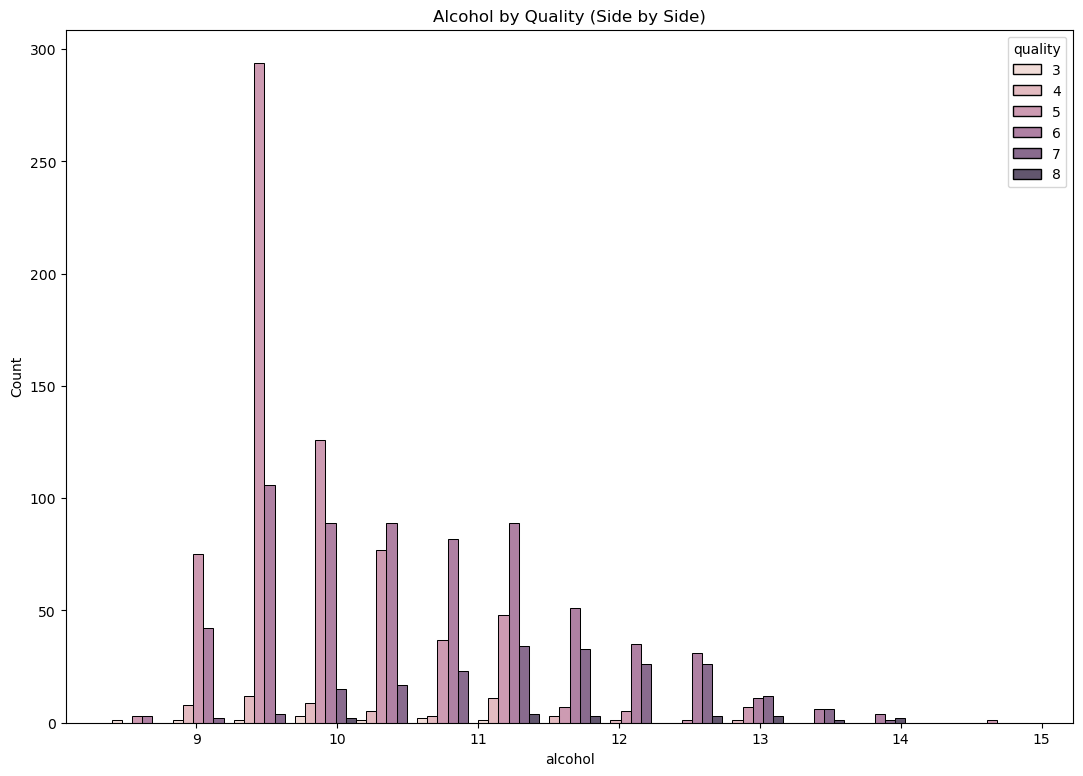

In [17]:
plt.figure(figsize = (13, 9))
sns.histplot(data=df, x='alcohol', hue='quality', multiple='dodge', bins=15)
plt.title('Alcohol by Quality (Side by Side)')
plt.show()

In [18]:
print(df["quality"].unique())
print(df["quality"].nunique())

[5 6 7 4 8 3]
6


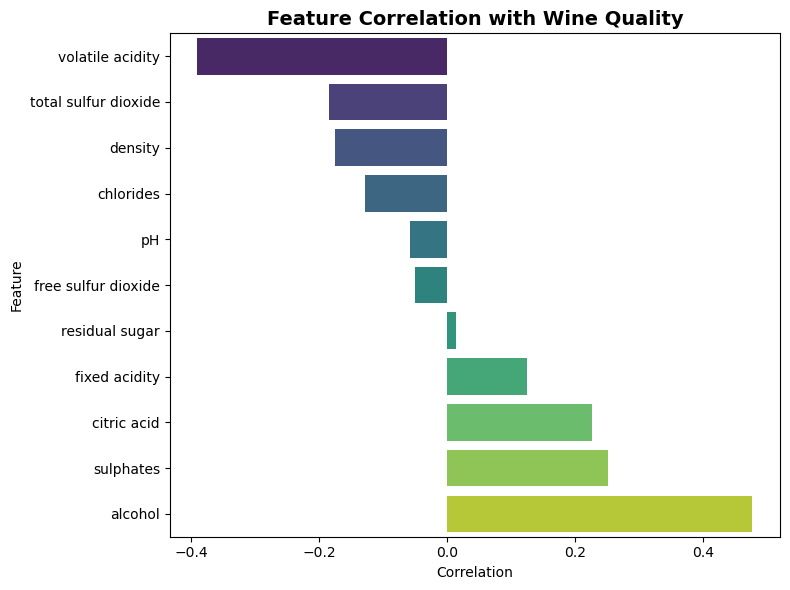

In [19]:
corr = df.corr(numeric_only=True)['quality'].drop('quality').sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.index,        # assign hue explicitly
    palette="viridis",
    dodge=False,
    legend=False           # hide legend (since y already labels categories)
)
plt.title("Feature Correlation with Wine Quality", fontsize=14, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
df = df.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Average',
                                    5 : 'Average',
                                    4 : 'Poor',
                                    3 : 'Poor',
        }
                }
)

In [21]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4  Average  
1      9.8  Average  
2      9.8  Average  
3      9.8  Average  
4      9.4  Average

In [22]:
df.quality.value_counts()

quality
Average    1319
Good        217
Poor         63
Name: count, dtype: int64

In [23]:
# df = df.drop(['volatile acidity', 'free sulfur dioxide'], axis = 1)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol',]
joblib.dump(features, "feature_columns.pkl")

['feature_columns.pkl']

In [26]:
df = df.drop(['chlorides', 'pH', 'residual sugar', 'free sulfur dioxide'], axis = 1)

In [27]:
X = df.drop('quality', axis = 1)
y = df['quality']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=7)
X_new = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top 7 Selected Features:")
print(selected_features)

Top 7 Selected Features:
Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

Top 7 Important Features:
alcohol                 0.192065
volatile acidity        0.152807
sulphates               0.145684
total sulfur dioxide    0.137012
density                 0.131823
citric acid             0.125106
fixed acidity           0.115504
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_9260\1173476371.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.head(10), y=feat_importances.head(10).index, palette="viridis")


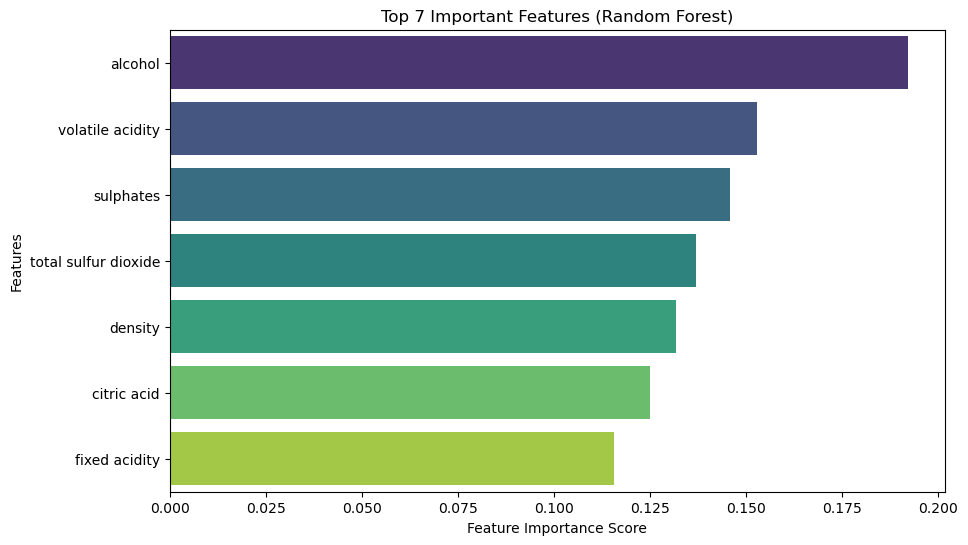

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display top features
print("Top 7 Important Features:")
print(feat_importances.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.head(10), y=feat_importances.head(10).index, palette="viridis")
plt.title("Top 7 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

In [31]:
df1 = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']]
df1

fixed acidity  volatile acidity  citric acid  total sulfur dioxide  \
0               7.4             0.700         0.00                  34.0   
1               7.8             0.880         0.00                  67.0   
2               7.8             0.760         0.04                  54.0   
3              11.2             0.280         0.56                  60.0   
4               7.4             0.700         0.00                  34.0   
...             ...               ...          ...                   ...   
1594            6.2             0.600         0.08                  44.0   
1595            5.9             0.550         0.10                  51.0   
1596            6.3             0.510         0.13                  40.0   
1597            5.9             0.645         0.12                  44.0   
1598            6.0             0.310         0.47                  42.0   

      density  sulphates  alcohol  quality  
0     0.99780       0.56      9.4  Average  
1     0.99680       0.68      9.8  Average  
2     0.99700       0.65      9.8  Average  
3     0.99800       0.58      9.8  Average  
4     0.99780       0.56      9.4  Average  
...       ...        ...      ...      ...  
1594  0.99490       0.58     10.5  Average  
1595  0.99512       0.76     11.2  Average  
1596  0.99574       0.75     11.0  Average  
1597  0.99547       0.71     10.2  Average  
1598  0.99549       0.66     11.0  Average  

[1599 rows x 8 columns]

In [32]:
X1 = df.drop('quality', axis = 1)
y1 = df['quality']


X_scaled = scaler.fit_transform(X1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [34]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [35]:
X_train1 = pd.DataFrame(X_train1, columns = X_train.columns)
X_train1

fixed acidity  volatile acidity  citric acid  total sulfur dioxide  \
0          0.362832          0.390411         0.31              0.265018   
1          0.132743          0.061644         0.40              0.561837   
2          0.557522          0.184932         0.47              0.028269   
3          0.371681          0.386986         0.26              0.060071   
4          0.336283          0.626712         0.15              0.169611   
...             ...               ...          ...                   ...   
1274       0.398230          0.328767         0.00              0.014134   
1275       0.318584          0.352740         0.10              0.190813   
1276       0.230088          0.342466         0.06              0.279152   
1277       0.292035          0.054795         0.35              0.031802   
1278       0.106195          0.116438         0.26              0.017668   

       density  sulphates   alcohol  
0     0.743759   0.226994  0.492308  
1     0.082966   0.134969  0.538462  
2     0.596916   0.233129  0.215385  
3     0.504405   0.061350  0.153846  
4     0.655653   0.073620  0.230769  
...        ...        ...       ...  
1274  0.560206   0.159509  0.307692  
1275  0.463289   0.233129  0.384615  
1276  0.542584   0.104294  0.169231  
1277  0.331131   0.263804  0.538462  
1278  0.104993   0.104294  0.784615  

[1279 rows x 7 columns]

In [36]:
from imblearn.combine import SMOTEENN
X_resampled, y_resampled = SMOTEENN(random_state=42).fit_resample(X1, y1)

In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

In [38]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name} ---")
    model.fit(X_train1, y_train)
    y_pred = model.predict(X_test1)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} accuracy: {accuracy*100:.2f} %")

Training Logistic Regression ---
Logistic Regression accuracy: 57.19 %
Training Decision Tree ---
Decision Tree accuracy: 82.19 %
Training Random Forest ---


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest accuracy: 87.19 %
Training SVM ---
SVM accuracy: 66.25 %
Training Naive Bayes ---
Naive Bayes accuracy: 79.69 %


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [39]:
sorted_result = sorted(results.items(), key = lambda x: x[1], reverse = True)
for model_name, accuracy in sorted_result:
    print(f"{model_name}: {accuracy*100:.2f} %")

Random Forest: 87.19 %
Decision Tree: 82.19 %
Naive Bayes: 79.69 %
SVM: 66.25 %
Logistic Regression: 57.19 %


In [40]:
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators":[50, 100, 150],
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_features" : ['sqrt', 'log2'],
    "max_depth": [10, 20, 30],
    "min_samples_split":[2, 5, 10]
}

In [41]:
grid_search = GridSearchCV(RandomForestClassifier(), param, cv= 5, n_jobs = 1, verbose = 1)
grid_search.fit(X_train, y_train)
print(f"Best parameters for random forest classifier are {grid_search.best_params_}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for random forest classifier are {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
best_model = grid_search.best_estimator_
cvscores = cross_val_score(best_model, X_scaled, y, cv = 5)
print(f"The cross validation score for Random Forest Classifier are: {cvscores}")

The cross validation score for Random Forest Classifier are: [0.828125   0.828125   0.853125   0.796875   0.84326019]


In [43]:
print(f"The mean Cross validation score of Random Forest Classifier is {cvscores.mean()}")

The mean Cross validation score of Random Forest Classifier is 0.8299020376175548


In [44]:
joblib.dump(best_model, "wine_quality_prediction_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [45]:
import pkg_resources
libs = ["pandas", "numpy", "seaborn", "matplotlib", "scikit-learn", "joblib", "math"]
with open("requirements.txt", "w") as f:
    for lib in libs:
        try:
            version = pkg_resources.get_distribution(lib).version
            f.write(f"{lib}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"{lib} is not installed in this environmnet.")

math is not installed in this environmnet.


In [46]:
!type requirements.txt

pandas==2.2.2
numpy==1.26.4
seaborn==0.13.2
matplotlib==3.9.2
scikit-learn==1.7.2
joblib==1.4.2
